# Analiza corelatiei dintre PIB si producerea de energie regenerabila in Germania si la nivel european

## I Etapa: Analiza corelatie PIB-Energie regenerabila la nivel de tara (Germania)

### 1.1 Instalarea sau importul librariilor necesare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

### 1.2 Încărcarea datelor CSV

In [2]:
df = pd.read_csv("energie_si_economie_germania.csv")

### 1.3 Formarea paletei de culori per Land

In [3]:
palette = {
    "Baden-Wuerttemberg": "#1f77b4", 
    "Bayern": "#2ca02c",              
    "Berlin": "#8c564b",              
    "Brandenburg": "#e377c2",         
    "Bremen": "#7f7f7f",              
    "Hamburg": "#bcbd22",            
    "Hessen": "#17becf",              
    "Mecklenburg-Vorpommern": "#9467bd",  
    "Niedersachsen": "#ff7f0e",       
    "Nordrhein-Westfalen": "#d62728", 
    "Rheinland-Pfalz": "#aec7e8",     
    "Saarland": "#c49c94",            
    "Sachsen": "#f7b6d2",             
    "Sachsen-Anhalt": "#c7c7c7",      
    "Schleswig-Holstein": "#ffbb78", 
    "Thueringen": "#000000"
    }

### 1.4 Afișarea primeleor rânduri din Tabela

In [4]:
print(df.head())

                 Land  PIB_capita  Energie_regenerabila_pct  Consum_capita  \
0  Baden-Wuerttemberg      650225                      33.1           4241   
1              Bayern      791603                      47.5           6041   
2              Berlin      207058                      26.3           6824   
3         Brandenburg       97540                      33.1           6612   
4              Bremen       41357                      36.5           5363   

   Educatie_pct  Urbanizare_pct  
0          38.2            77.5  
1          39.1            74.8  
2          26.5            84.0  
3          53.9            69.9  
4          47.1            93.1  


### 1.5 Calcularea statisticii descriptive

In [5]:
display(df.describe())

,PIB_capita,Energie_regenerabila_pct,Consum_capita,Educatie_pct,Urbanizare_pct
count,16.000000,16.00000,16.000000,16.000000,16.000000
mean,255226.000000,39.83125,6041.687500,38.581250,81.650000
std,242958.208857,13.28090,1208.779424,11.389657,11.346071
min,41357.000000,22.10000,4034.000000,21.600000,65.200000
25%,79103.250000,28.67500,5277.500000,28.850000,71.475000
50%,161883.000000,38.50000,5998.000000,38.650000,80.750000
75%,371540.250000,47.35000,6886.250000,49.575000,92.000000
max,791603.000000,63.50000,8014.000000,53.900000,99.500000


### 1.6 Corelații întrre variabile

In [6]:
correlatii = df.corr(numeric_only=True)
display(correlatii)

,PIB_capita,Energie_regenerabila_pct,Consum_capita,Educatie_pct,Urbanizare_pct
PIB_capita,1.000000,0.060659,-0.504517,-0.159038,-0.209811
Energie_regenerabila_pct,0.060659,1.000000,-0.139750,0.197847,-0.379369
Consum_capita,-0.504517,-0.139750,1.000000,0.049260,0.149082
Educatie_pct,-0.159038,0.197847,0.049260,1.000000,-0.127199
Urbanizare_pct,-0.209811,-0.379369,0.149082,-0.127199,1.000000


### 1.7 Scatterplot PIB vs Energie

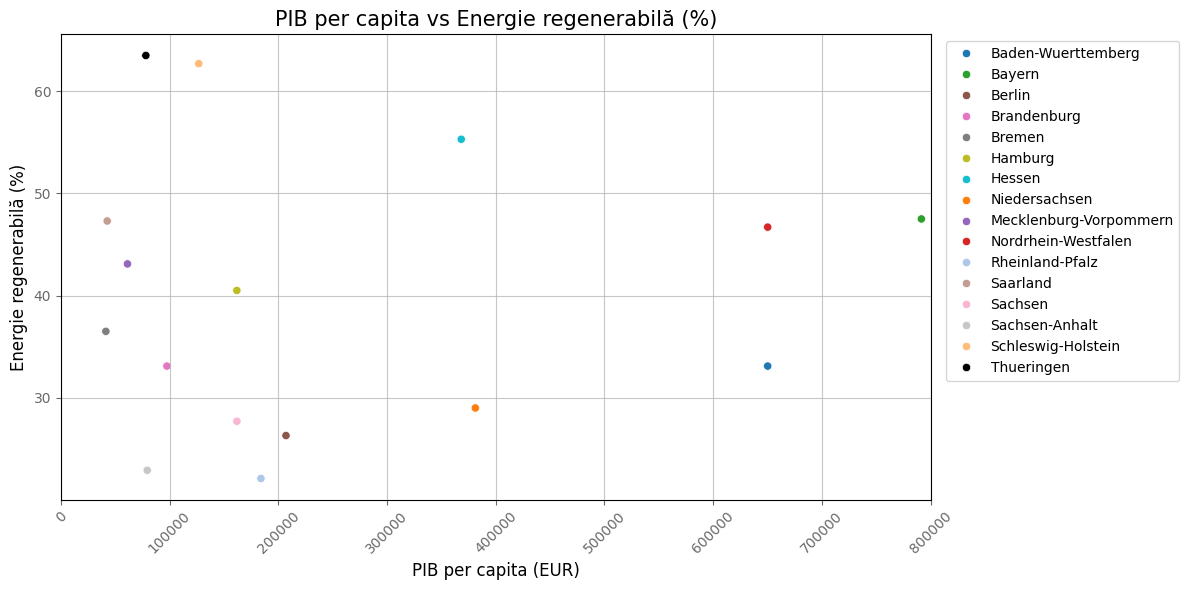

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="PIB_capita", y="Energie_regenerabila_pct", hue="Land", palette=palette)
plt.title("PIB per capita vs Energie regenerabilă (%)", fontsize=15)
plt.xlabel("PIB per capita (EUR)", fontsize=12)
plt.ylabel("Energie regenerabilă (%)", fontsize=12)
plt.xticks(rotation=45)
plt.xlim(0, 800000)
plt.tick_params(axis='x', labelsize=10, colors='dimgray')
plt.tick_params(axis='y', labelsize=10, colors='dimgray')
plt.grid(True, linestyle='-', linewidth=0.8, alpha=0.7)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 1.8 Heatmap corelații 

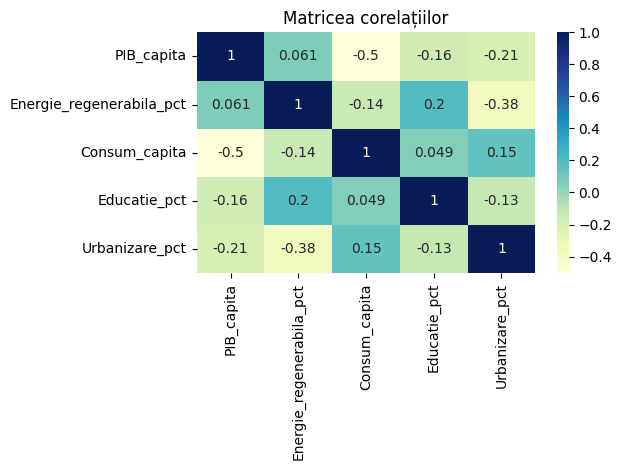

In [8]:
sns.heatmap(correlatii, annot=True, cmap="YlGnBu")
plt.title("Matricea corelațiilor")
plt.tight_layout()
plt.show()

## Etapa II: PIB - Generarea hartilor statice 

### 2.1_Încarcăm shapefile-ul și CSV-ul

In [9]:
shapefile_path = "Landuri_DE.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.merge(df, left_on="NUTS_NAME", right_on="Land")

### 2.2 Generarea hartii - PIB per capita

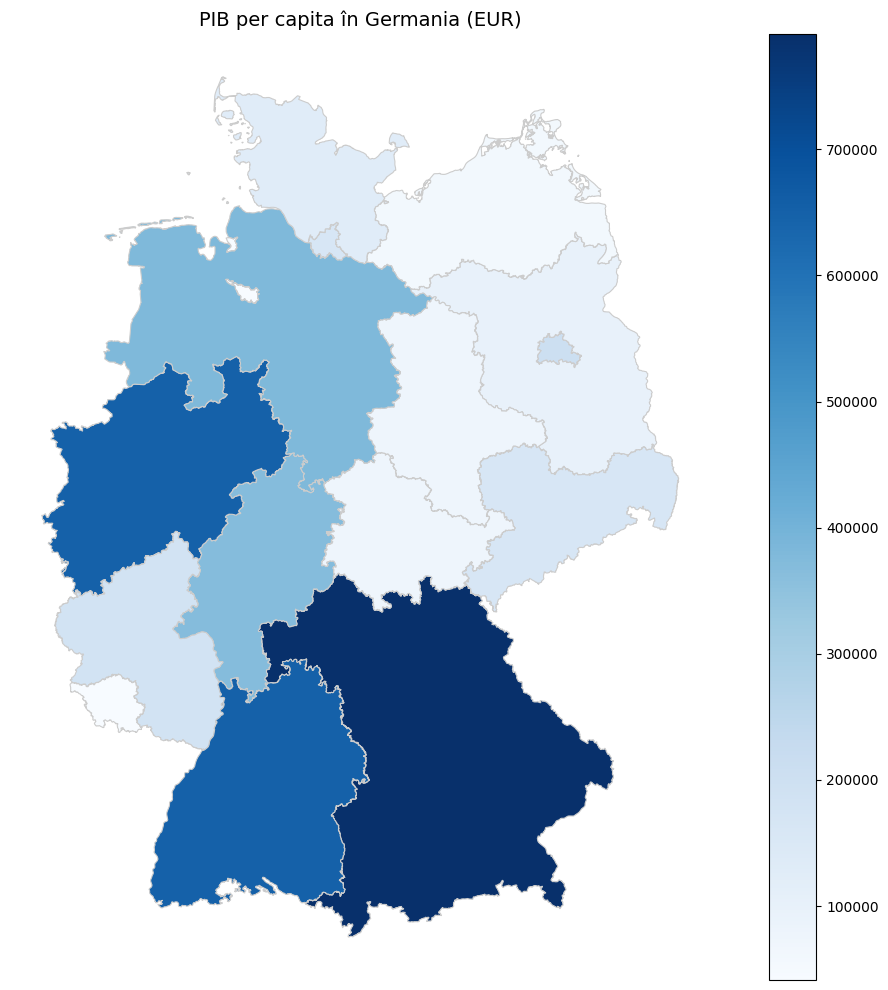

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="PIB_capita",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("PIB per capita în Germania (EUR)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

### 2.3 Generarea hartii - Energie regenarabila

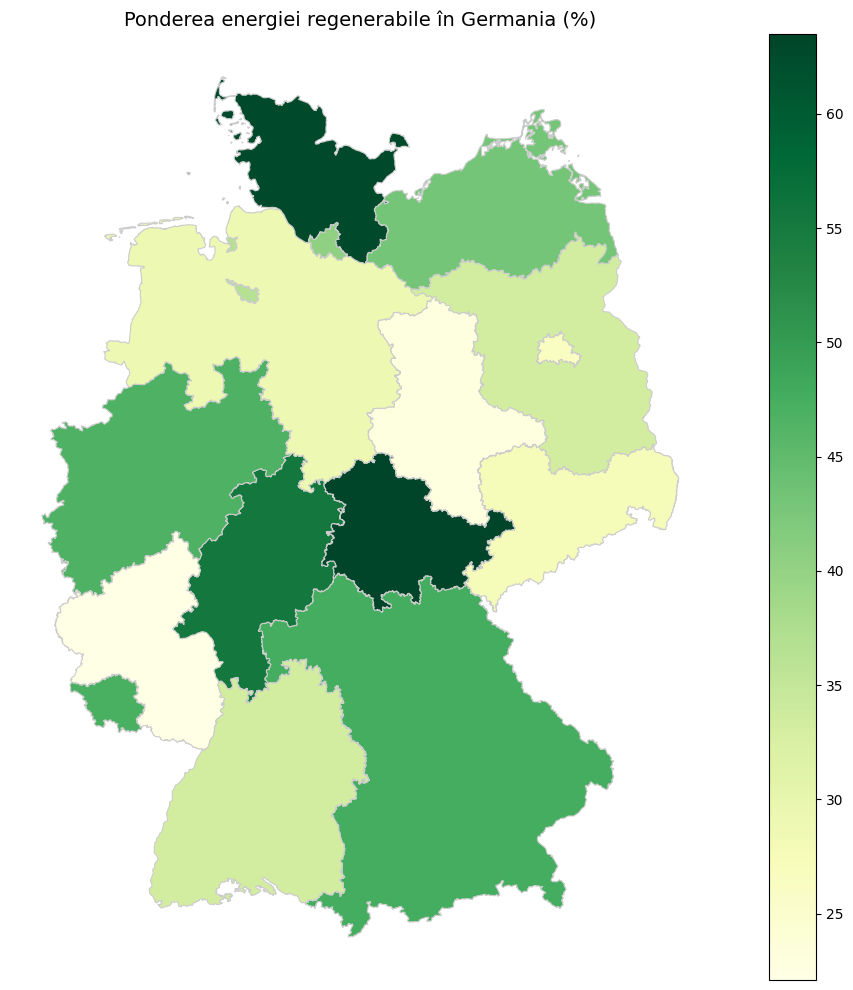

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="Energie_regenerabila_pct",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("Ponderea energiei regenerabile în Germania (%)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

### 2.4 Salvare hartii PIB per capita ca PDF

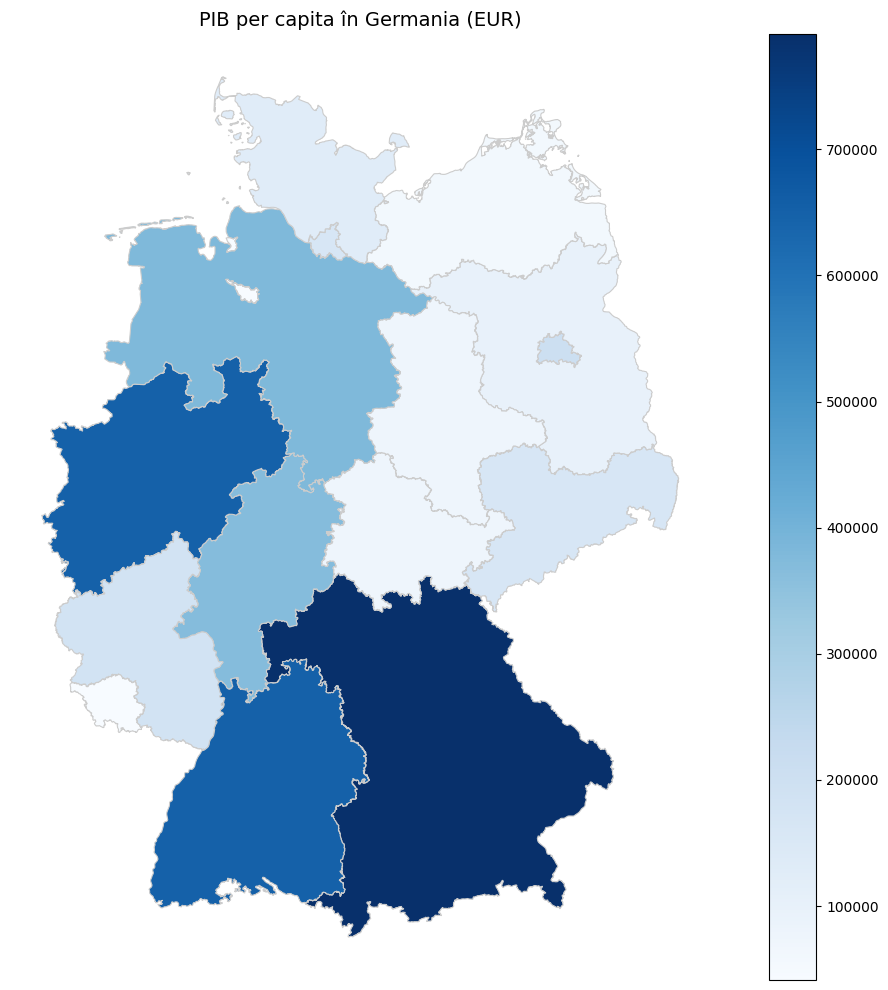

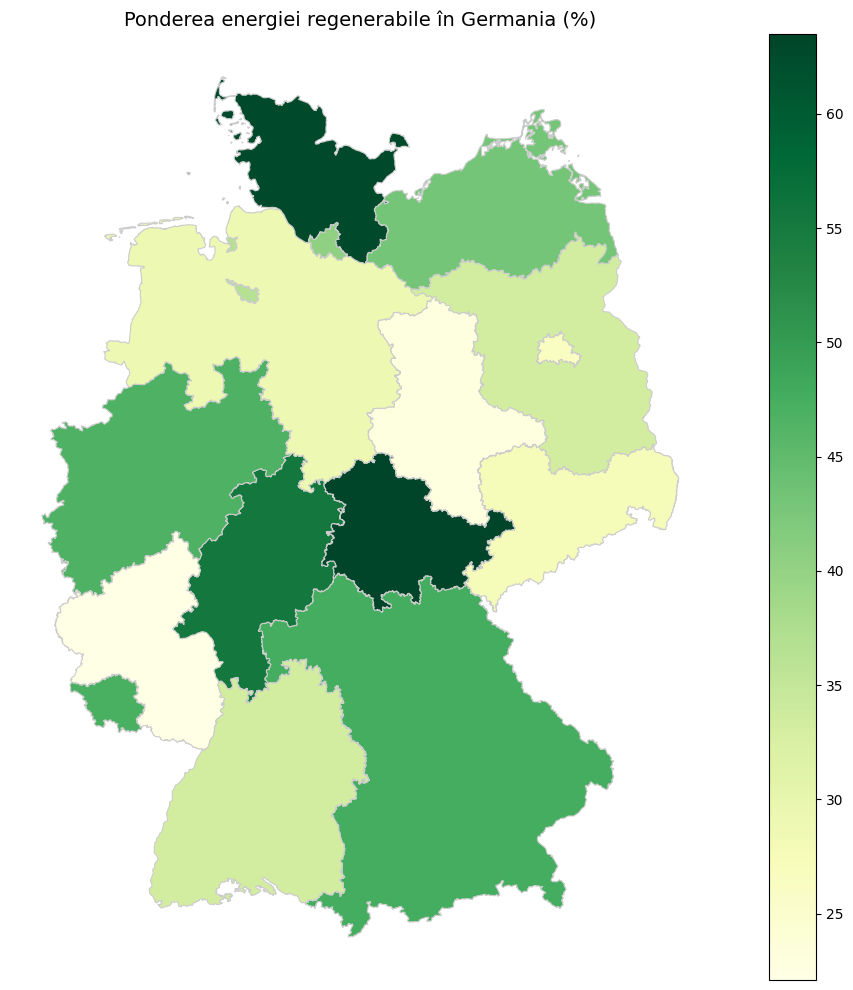

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="PIB_capita",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("PIB per capita în Germania (EUR)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("harta_pib_germania.pdf")
# plt.show()

fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="Energie_regenerabila_pct",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
    )
ax.set_title("Ponderea energiei regenerabile în Germania (%)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("harta_energie_regenerabila.pdf")
plt.show()


## 3 Germania vs Europa

### 3.1 Importul bibliotecilor și a datelor necesare

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Incarcam datele
csv_path = r"C:\01_Rodica\Python\Homeworks_Github\01_Proiect_final\energie_si_economie_europa.csv"
df_eu = pd.read_csv(csv_path)

# Verificam primele randuri
print(df_eu.head())

        Tara  PIB_per_capita_EUR  Energie_regenerabila_pct  \
0   Norvegia               95000                      60.2   
1    Elvetia               88000                      65.1   
2  Danemarca               73000                      75.0   
3   Germania               62000                      48.3   
4     Suedia               58000                      68.5   

   Consum_per_capita_EUR  
0                  40000  
1                  39000  
2                  37000  
3                  36000  
4                  35000  


### 3.2 Elaborarea personalizată a paletei cu 26 culori distincte

In [14]:
culori_26 = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#393b79", "#637939",
    "#8c6d31", "#843c39", "#7b4173", "#3182bd", "#e6550d", "#31a354",
    "#756bb1", "#636363", "#ff9896", "#98df8a", "#c5b0d5", "#c49c94",
    "#f7b6d2", "#9edae5"
]

### 3.3 Generarea hartii PIB vs Energie regenerabilă

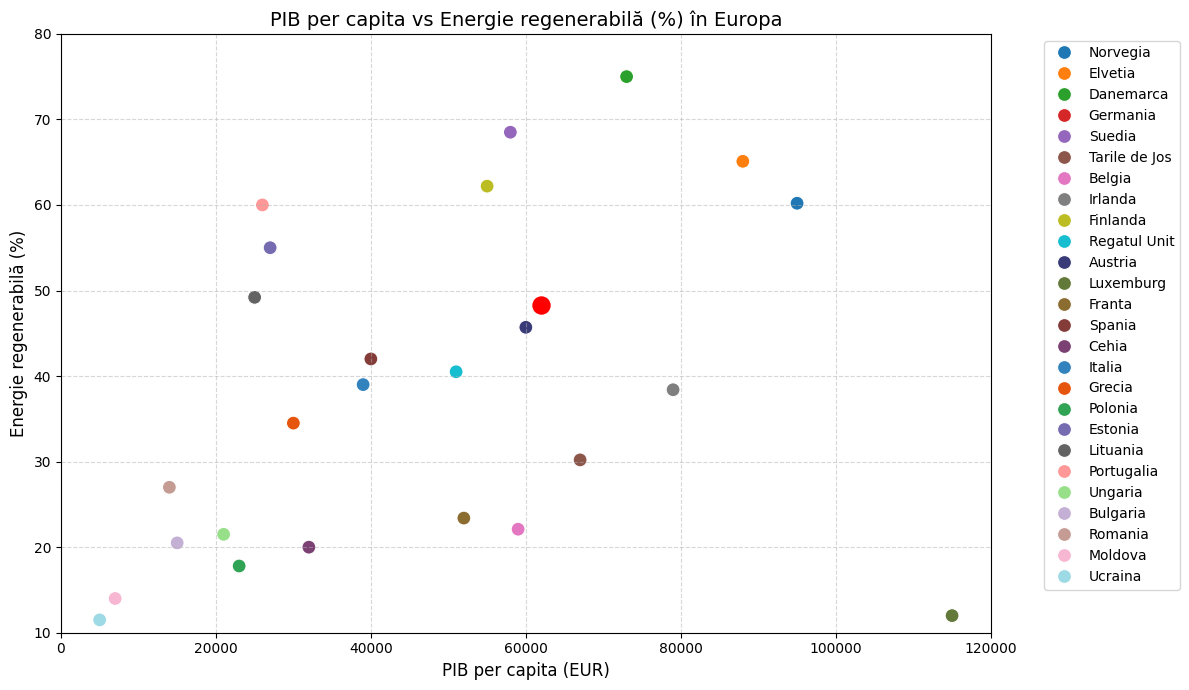

In [16]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_eu,
    x="PIB_per_capita_EUR",
    y="Energie_regenerabila_pct",
    hue="Tara",
    palette=culori_26,
    s=100
)

# Pasul_3.3: Evidențiem Germania
germany = df_eu[df_eu["Tara"] == "Germania"]
plt.scatter(germany["PIB_per_capita_EUR"], germany["Energie_regenerabila_pct"], color="red", s=150)
plt.title("PIB per capita vs Energie regenerabilă (%) în Europa", fontsize=14)
plt.xlabel("PIB per capita (EUR)", fontsize=12)
plt.ylabel("Energie regenerabilă (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(10, 80)
plt.xlim(0, 120000)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("Grafic.png")  
plt.show()

### Analiza datelor